# Investigate a Dataset (TMDb Movie Data)

**Contents**
* [Introduction](#Introduction)
* [Packages](#Packages)
* [Data Wrangling](#Data_Wrangling)
    * [Explore data](#Explore_data)
    * [Data cleaning](#Data_cleaning)
* [Exploratory Data Analysis](#Exploratory_Data_Analysis)
   * [Research Question 1](#Research_Question_1)
   * [Research Question 2](#Research_Question_2)
   * [Research Question 3](#Research_Question_3)
   * [Research Question 4](#Research_Question_4)
* [Conclusions](#Conclusions)


<a id='Introduction'></a> <br>
# Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
> > -  Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
> > -  There are some odd characters in the ‘cast’ column, We can leave them as is.
> > -  The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

> Initially, these data are useful for both production companies and movie aficionados, so our questions should focus on both sides and how each benefit from data.

> __For filmmakers, are there a certain production companies that have found a consistent formula, which means they are always/mostly producing or participating in production of the most successful commercial movies? Is a film costing over 100 million dollars to produce can still flop or in clearer Can the producer risk producing a movie at a high cost (100m or more) with the possibility of commercial loss??__

> __For movie aficionados with different interests, can we predict which films will be highly rated whether or not they are a commerical success? What are the most popular genres among movie aficionados?And do this popular change by years?__

<a id='Packages'></a> <br>
# Packages

In [1]:
# First, we import few python packages required to investigate the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%matplotlib inline

<a id='Data_Wrangling'></a> <br>
# Data Wrangling

<a id='Explore_data'></a> <br>
### Explore data

> I will load in the data, using (read_csv) function. Dataset is downloaded from Kaggle __[here](https://www.kaggle.com/tmdb/tmdb-movie-metadata)__, in csv format('tmdb-movies.csv'). And i will check for cleanliness, and then trim and clean the dataset for analysis. 

In [2]:
# Load data into a pandas DataFrame and print out a few lines 
df = pd.read_csv('tmdb-movies.csv')   
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [3]:
# Inspect data types and looking for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# View clearer null values in the data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

 >From the result, the data is consisting of 10866 rows or movies and 21 columns between (float, int and object/string), and there is some data values is null value needed to droped from the dataframe as well as a mistake entries such as zero budget/revenue value which is not real.
Another note is that there is some columns we have no need of it in our analytices and its presence or absence doesn't affect our calculations such is __['homepage', 'overview', 'runtime','release_date', 'tagline', 'keywords']__, so will drop it totaly from the dataframe.

<a id='Data_cleaning'></a> <br>
### Data cleaning
(Droping unneeded columns, null values and mistake entries)

In [5]:
# First, drop unneeded columns and print a one line to ensure
df.drop(['homepage', 'overview', 'runtime','release_date', 'tagline', 'keywords'], axis=1, inplace=True)
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


In [6]:
# Then, drop rows with null values to maintain a clean data and make sure the result
df.dropna(inplace=True)
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [7]:
# Drop rows with mistake budget/revenue entries
df.drop(df.query('revenue == 0 or budget == 0').index, inplace=True)

In [8]:
# Setting movie title as the index of the data for ease of indexing and for visualizations purposes
df.set_index('original_title', inplace=True)
df.head()

,id,imdb_id,popularity,budget,revenue,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
original_title,,,,,,,,,,,,,,
Jurassic World,135397,tt0369610,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
Mad Max: Fury Road,76341,tt1392190,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
Insurgent,262500,tt2908446,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
Star Wars: The Force Awakens,140607,tt2488496,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
Furious 7,168259,tt2820852,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
# View modified properties of cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3806 entries, Jurassic World to Fantastic Voyage
Data columns (total 14 columns):
id                      3806 non-null int64
imdb_id                 3806 non-null object
popularity              3806 non-null float64
budget                  3806 non-null int64
revenue                 3806 non-null int64
cast                    3806 non-null object
director                3806 non-null object
genres                  3806 non-null object
production_companies    3806 non-null object
vote_count              3806 non-null int64
vote_average            3806 non-null float64
release_year            3806 non-null int64
budget_adj              3806 non-null float64
revenue_adj             3806 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 446.0+ KB


<a id='Exploratory_Data_Analysis'></a> <br>
# Exploratory Data Analysis

Now that we've trimmed and cleaned the data, so lets move on to exploration. I compute statistics and create visualizations with the goal of addressing the research questions that i posed in the Introduction section.


___________________________________________________________________________________________________________________________
<a id='Research_Question_1'></a> <br>
### Research Question 1 (For filmmakers, are there certain production companies that have found a consistent formula?)

>Note that there are movies that are not active means that have not received enough voting (less than 500 votes) which will affect our conclusions, so we will select the only the movies that received more than 500 votes and work with.

In [10]:
# Select active movies and view properties of new dataframe
active_movies = df.query('vote_count >= 500')
active_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1081 entries, Jurassic World to Halloween
Data columns (total 14 columns):
id                      1081 non-null int64
imdb_id                 1081 non-null object
popularity              1081 non-null float64
budget                  1081 non-null int64
revenue                 1081 non-null int64
cast                    1081 non-null object
director                1081 non-null object
genres                  1081 non-null object
production_companies    1081 non-null object
vote_count              1081 non-null int64
vote_average            1081 non-null float64
release_year            1081 non-null int64
budget_adj              1081 non-null float64
revenue_adj             1081 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 126.7+ KB


 >1081 active titles we have, Surely the production companies that co-produced of top revenue of them they are the ones we want.

In [11]:
# Select top 100 revenue movies
top_100_revenue = active_movies.sort_values(by='revenue_adj', ascending=False)[:100]

# Extract the production companies from the top 100 revenue movies to a set() type to sure getting unique names not repeated
companies_by_top100 = set()
for company in top_100_revenue['production_companies'].str.split('|').values:
    companies_by_top100 = companies_by_top100.union(set(company))
companies_by_top100

{'1492 Pictures',
 '3Foot7',
 'Alfran Productions',
 'Amblin Entertainment',
 'Argyle Enterprises',
 'B24',
 'Bad Robot',
 'Barry Mendel Productions',
 'Blue Sky Studios',
 'Bulletproof Cupid',
 'Canal+',
 'Carolco Pictures',
 'Centropolis Entertainment',
 'Color Force',
 'Columbia Pictures',
 'Columbia Pictures Corporation',
 'Cool Music',
 'DC Comics',
 'DC Entertainment',
 'Danjaq',
 'Dentsu',
 'Di Bonaventura Pictures',
 'Disney Enterprises',
 'Dovemead Films',
 'DreamWorks Animation',
 'DreamWorks SKG',
 'Dune Entertainment',
 'EMI Films',
 'Eon Productions',
 'Farewell Productions',
 'Film Export A.G.',
 'Fuji Television Network',
 'Government of Malta',
 'Harry Potter Publishing Rights',
 'Hasbro',
 'Heineken Branded Entertainment',
 'Heyday Films',
 'Hollywood Pictures',
 'Hoya Productions',
 'Hughes Entertainment',
 'Illumination Entertainment',
 'Imagine Entertainment',
 'Imprint Entertainment',
 'Indochina Productions',
 'Ingenious Film Partners',
 'Jerry Bruckheimer Films',

 >Each movie is co-produced by a group of companies, not a single company, so we need to know the companies with the largest share of the list, which will certainly be the ones that we want. To determine these companies we need to calculate the frequency of repetition of the name of each company in the list.

In [12]:
# Define a function that calculate the frequency number of each keyword appears in a dataframe columns strings
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count


# Get a sorted by freq. company list using 'count_word' method
companies_number_produced, dum = count_word(top_100_revenue,'production_companies', companies_by_top100)


# Top 10 companies
top_revenue_10_companies = companies_number_produced[:10]
top_revenue_10_companies

[['Warner Bros.', 15],
 ['Walt Disney Pictures', 14],
 ['Paramount Pictures', 12],
 ['Lucasfilm', 11],
 ['Heyday Films', 8],
 ['Universal Pictures', 8],
 ['Twentieth Century Fox Film Corporation', 7],
 ['Columbia Pictures', 7],
 ['Amblin Entertainment', 7],
 ['WingNut Films', 6]]

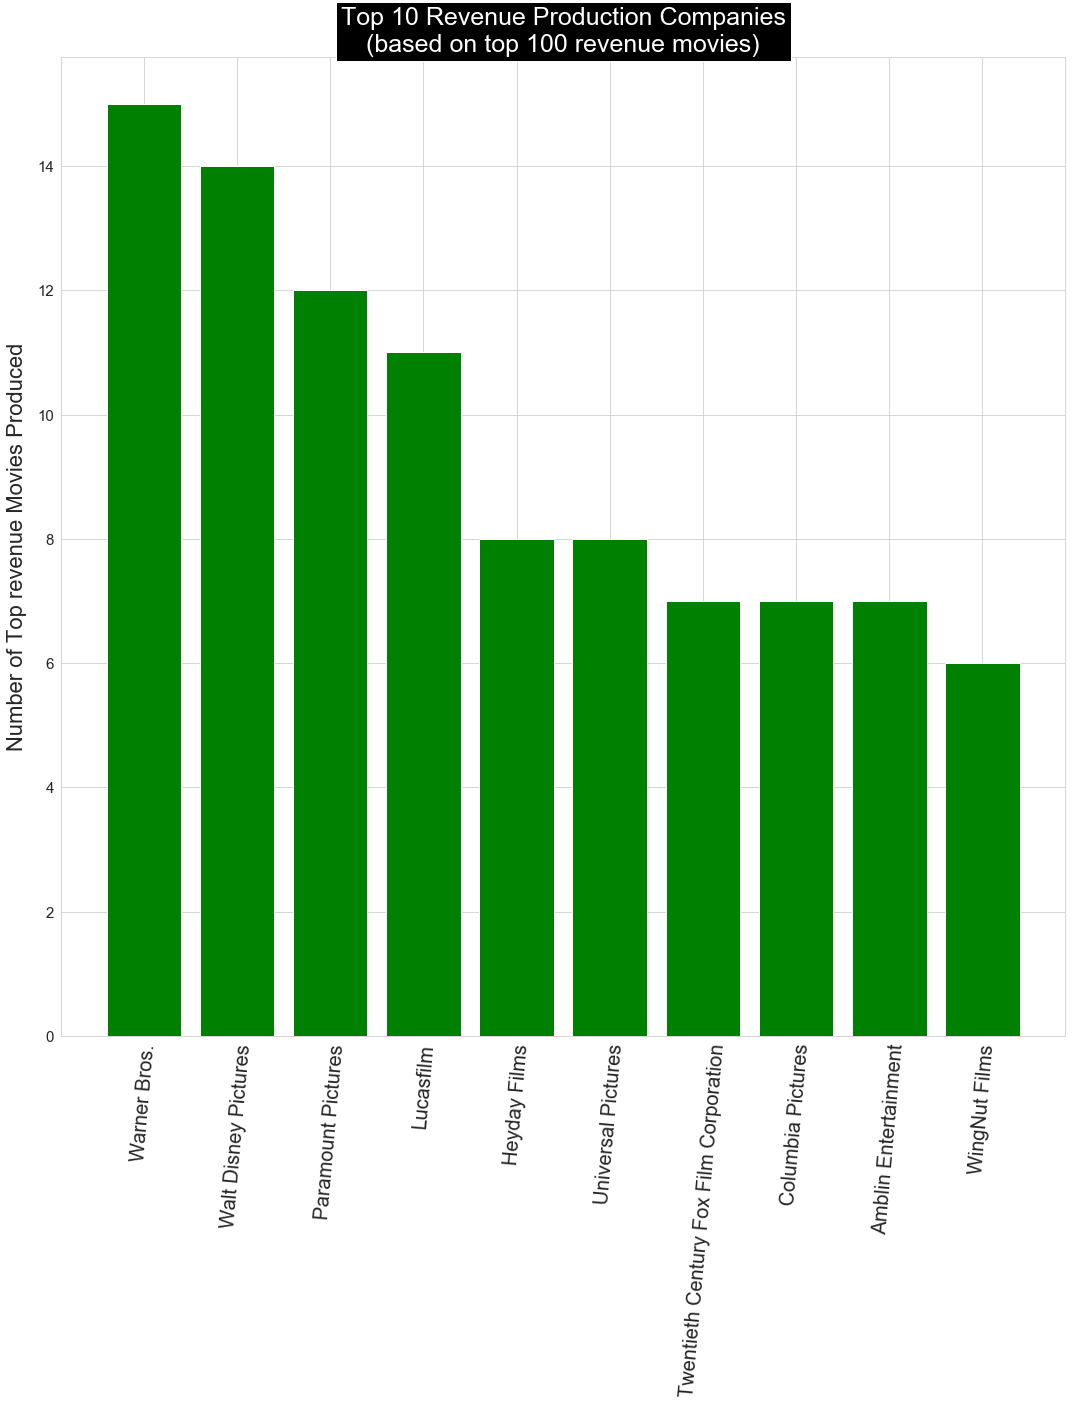

In [13]:
# Draw a bar chart of the first/top 10 companies according to their frequencies
sns.set_style('whitegrid')  # Set a style for the background of the chart
f, ax = plt.subplots(figsize=(18,18)) 
x_axis = [k for k,i in enumerate(top_revenue_10_companies)]  # The x axis is the top 10 companies names
y_axis = [i[1] for i in top_revenue_10_companies]  # The y axis is the frequancies(number of the movies produced from top 100)
x_label = [i[0] for i in top_revenue_10_companies]  # Names of the companies
plt.xticks(rotation=85, fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("Number of Top revenue Movies Produced", fontsize = 22, labelpad = 10)
plt.title('Top 10 Revenue Production Companies\n(based on top 100 revenue movies)' ,bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
ax.bar(x_axis, y_axis, align = 'center', color='g');

 >"Warner Bros." is the top production company of all the production companies with 15 movie co-produced from the top 100 revenue movies all the time, followed by "Walt Disney Pictures" by 14 movies co-produced, then "Paramount Pictures" with 12 movie co-produced.


_________________________________________________________________________________________________________________________
<a id='Research_Question_2'></a> <br>
### Research Question 2  (For filmmakers, is a film costing over $100M to produce can still flop?)

 > Can the producer risk producing a movie at a high cost ($ 100 million or more) with the possibility of commercial loss?
   > Failed commercially movies means that its reward revenue is less than than its costed budget, so lets extract the commercially failed movies that costed 100m or more from our data and take a closer look.

In [14]:
# Select the movies which budget more than 100m and revenue less thna budget
budget100m_failed_movies = active_movies.query('budget >= 1.0e+08 and revenue < budget')[['release_year', 'production_companies', 'budget','revenue']]

# Adding a new columns containing the revenue-budget proportion
budget100m_failed_movies['revenue_prop'] = budget100m_failed_movies.revenue/budget100m_failed_movies.budget

# Sort the movies by revenue proportion in ascending order
budget100m_failed_movies.sort_values(by='revenue_prop', inplace=True)
budget100m_failed_movies

,release_year,production_companies,budget,revenue,revenue_prop
original_title,,,,,
Brother Bear,2003,Walt Disney Pictures|Walt Disney Feature Anima...,100000000,250,0.000003
The Lone Ranger,2013,Walt Disney Pictures|Jerry Bruckheimer Films|I...,255000000,89289910,0.350157
R.I.P.D.,2013,Universal Pictures|Original Film|Dark Horse En...,130000000,61648500,0.474219
Treasure Planet,2002,Walt Disney Pictures|Walt Disney Feature Anima...,140000000,109578115,0.782701
Pan,2015,Warner Bros.|Moving Picture Company (MPC)|Berl...,150000000,128388320,0.855922
47 Ronin,2013,Mid Atlantic Films|Stuber Productions|Universa...,175000000,150962475,0.862643
The Aviator,2004,Appian Way|Forward Pass|Cappa Productions|Warn...,116000000,102000000,0.879310
Pompeii,2014,Impact Pictures|TriStar Pictures|Don Carmody P...,130000000,117831631,0.906397
Bicentennial Man,1999,Laurence Mark Productions|1492 Pictures|Columb...,100000000,93700000,0.937000


 >As we note the less revenue prop. movie "Brother Bear" is a 250 dollars revenue and that is not realistic. This may be a mistake entry and preferably wiped out.

In [15]:
# Drop the mistake entry
active_movies.drop('Brother Bear', inplace=True)
budget100m_failed_movies.drop('Brother Bear', inplace=True)

C:\Users\Bassam\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


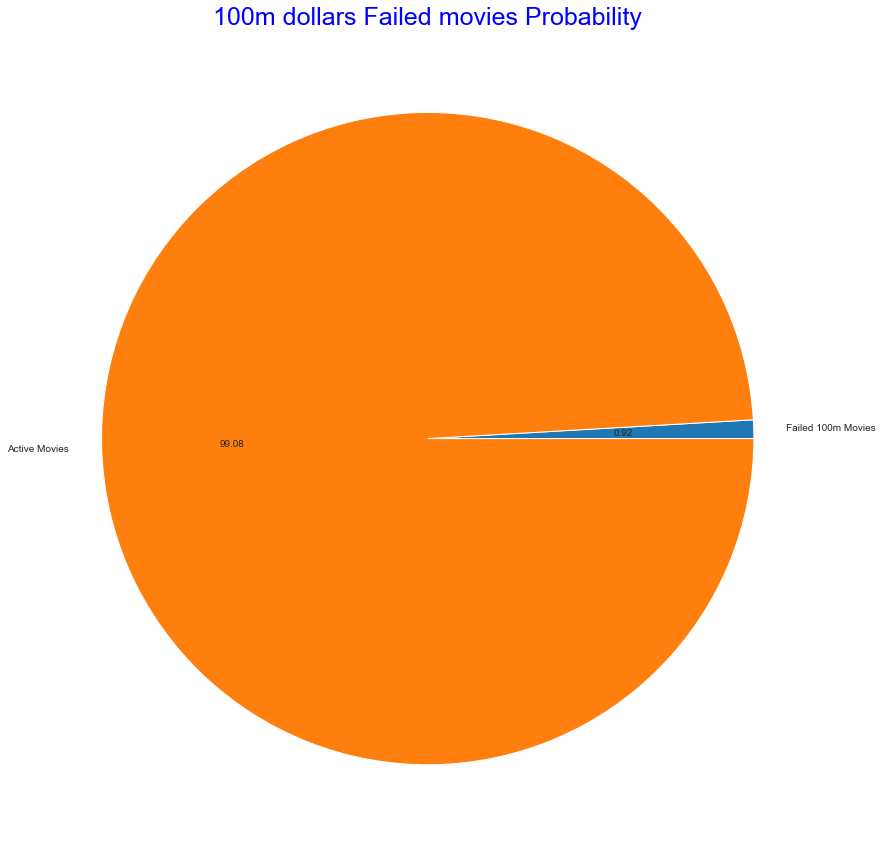

In [16]:
# Draw a pie chart to view the percentage/probability of 100m failed movies
f, ax = plt.subplots(figsize=(15,15))
plt.title('100m dollars Failed movies Probability', color='b',fontsize = 25)
plt.pie([len(budget100m_failed_movies), len(active_movies)], labels= ['Failed 100m Movies', 'Active Movies'] ,autopct='%.2f');

 > Note that the percentage of 100m failed movies is so weak (0.92%), so the probability of a commercial loss of producing a 100m dollars movie is so weak.

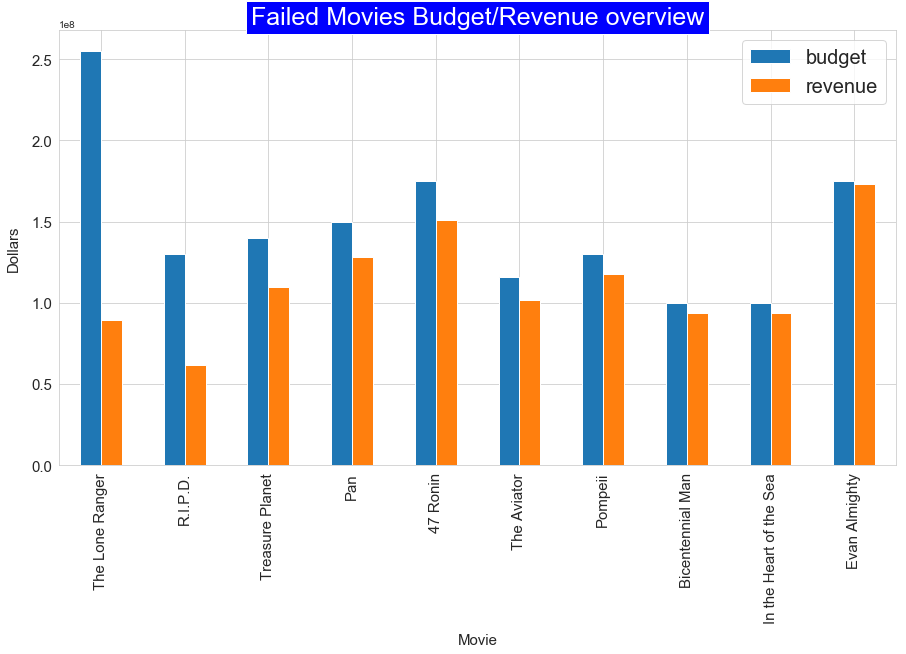

In [17]:
# Draw a bar chart to get encloser to the revenue-budget ratio of 100m failed movies
budget100m_failed_movies[['budget','revenue']].plot(kind='bar', figsize=(15,8))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("Dollars", fontsize = 15, labelpad = 10)
plt.xlabel("Movie", fontsize = 15, labelpad = 10)
plt.legend(prop={'size': 20})
plt.title('Failed Movies Budget/Revenue overview' ,bbox={'facecolor':'b', 'pad':5},color='w',fontsize = 25);


____________________________________________________________________________________________________________________________
<a id='Research_Question_3'></a> <br>
### Research Question 3 (For movie aficionados, can we predict which films will be highly rated whether or not they are a commerical success?)

 >I need to know the nature of the relationship between the rates of the commerically successful movies and its revenue (an inverse or reverse relationship or no rlationship between them). Here we should use the 'revenue_adj' column instead of the 'revenue' columns for normalizing results.
 First we drop the 10 failed movies from the data, then sort the data by vote_average in a descending order.

In [18]:
active_movies.drop(budget100m_failed_movies.index, inplace=True)

In [19]:
sorted_by_vote = active_movies.sort_values(by='vote_average', ascending=False)
sorted_by_vote.head()

,id,imdb_id,popularity,budget,revenue,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
original_title,,,,,,,,,,,,,,
The Shawshank Redemption,278,tt0111161,7.192039,25000000,28341469,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,Drama|Crime,Castle Rock Entertainment,5754,8.4,1994,3.677779e+07,4.169346e+07
The Godfather,238,tt0068646,5.738034,6000000,245066411,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,Drama|Crime,Paramount Pictures|Alfran Productions,3970,8.3,1972,3.128737e+07,1.277914e+09
Whiplash,244786,tt2582802,4.780419,3300000,13993093,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,Drama|Music,Bold Films|Blumhouse Productions|Right of Way ...,2372,8.2,2014,3.039600e+06,1.288891e+07
The Dark Knight,155,tt0468569,8.466668,185000000,1001921825,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,8432,8.1,2008,1.873655e+08,1.014733e+09
Fight Club,550,tt0137523,8.947905,63000000,100853753,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,Drama,Regency Enterprises|Fox 2000 Pictures|Taurus F...,5923,8.1,1999,8.247033e+07,1.320229e+08


 >Then plot a histogram of the vote_average and the revenue_adj to get the relationship between them visualized clearly.

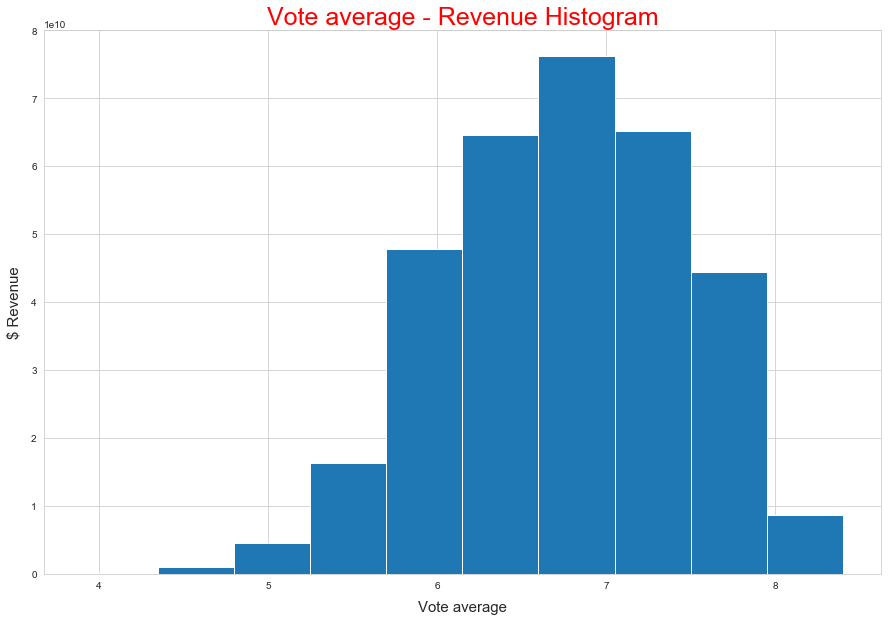

In [20]:
f, ax = plt.subplots(figsize=(15,10)) 
plt.ylabel("$ Revenue", fontsize = 15, labelpad = 10)
plt.xlabel("Vote average", fontsize = 15, labelpad = 10)
plt.title('Vote average - Revenue Histogram', color='r',fontsize = 25)
ax.hist(sorted_by_vote.vote_average, weights=sorted_by_vote.revenue_adj);

 >__Here we note the histogram is like (or mostly) left skewed, So it's likely that high-revenue movies are also often rated as high ratings by movies aficionados.__

 >We also note that there are some movies rated higher than 8 but had not got revenue of 100 million, which is:

In [21]:
sorted_by_vote.query('vote_average>= 8 and revenue_adj < 1.0e+08')

,id,imdb_id,popularity,budget,revenue,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
original_title,,,,,,,,,,,,,,
The Shawshank Redemption,278,tt0111161,7.192039,25000000,28341469,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,Drama|Crime,Castle Rock Entertainment,5754,8.4,1994,3.677779e+07,4.169346e+07
Whiplash,244786,tt2582802,4.780419,3300000,13993093,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,Drama|Music,Bold Films|Blumhouse Productions|Right of Way ...,2372,8.2,2014,3.039600e+06,1.288891e+07
Goodfellas,769,tt0099685,2.659926,25000000,46836394,Robert De Niro|Ray Liotta|Joe Pesci|Lorraine B...,Martin Scorsese,Drama|Crime,Warner Bros.,1798,8.0,1990,4.172246e+07,7.816519e+07
Room,264644,tt3170832,3.557846,6000000,35401758,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,Lenny Abrahamson,Drama|Thriller,Element Pictures|No Trace Camping|A24|Duperele...,1520,8.0,2015,5.519998e+06,3.256960e+07
The Usual Suspects,629,tt0114814,3.440238,6000000,23341568,Stephen Baldwin|Gabriel Byrne|Chazz Palminteri...,Bryan Singer,Drama|Crime|Thriller,Blue Parrot Productions|Bad Hat Harry Productions,1942,8.0,1995,8.585801e+06,3.340101e+07
American History X,73,tt0120586,1.333006,20000000,23875127,Edward Norton|Edward Furlong|Beverly D'Angelo|...,Tony Kaye,Drama,New Line Cinema|The Turman-Morrissey Company|S...,1563,8.0,1998,2.675391e+07,3.193765e+07


 > Six movies (including the top rated movie "The Shawshank Redemption") did not achieve high revenue.
 
 __________________________________________________________________________________________________________________
<a id='Research_Question_4'></a> <br>
### Research Question 4  (Which is the most popular genres between movies aficionados?)

 > To answer this question, should select the top popular movies from data according to the 'popularity' column, and extract the list of the different genres of the top popular movies, then calculate the frequency of each genre repeated from the 'genres' coumn using our previously defined 'count_word' method, then try to use a smart way to visualize data to be more clear to detect every genre popularity.

In [22]:
# Will consider the movie is popular if its popularity is more than 4.0 
top_popular_movies = df.query('popularity >= 1.0')
top_popular_movies

,id,imdb_id,popularity,budget,revenue,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
original_title,,,,,,,,,,,,,,
Jurassic World,135397,tt0369610,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
Mad Max: Fury Road,76341,tt1392190,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
Insurgent,262500,tt2908446,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
Star Wars: The Force Awakens,140607,tt2488496,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
Furious 7,168259,tt2820852,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09
The Revenant,281957,tt1663202,9.110700,135000000,532950503,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,7.2,2015,1.241999e+08,4.903142e+08
Terminator Genisys,87101,tt1340138,8.654359,155000000,440603537,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2598,5.8,2015,1.425999e+08,4.053551e+08
The Martian,286217,tt3659388,7.667400,108000000,595380321,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,4572,7.6,2015,9.935996e+07,5.477497e+08
Minions,211672,tt2293640,7.404165,74000000,1156730962,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2893,6.5,2015,6.807997e+07,1.064192e+09


In [23]:
# Etract the list of genres of the top popular movies into a set type container
genres_by_top_popular = set()
for genre in top_popular_movies['genres'].str.split('|').values:
    genres_by_top_popular = genres_by_top_popular.union(set(genre))
genres_by_top_popular

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller',
 'War',
 'Western'}

In [24]:
# Calculate the frequency of each genre in the top_popular_movies using prevously defined method 'count_word'
genres_frequency, dum = count_word(top_popular_movies,'genres', genres_by_top_popular)
genres_frequency

[['Drama', 553],
 ['Action', 547],
 ['Comedy', 496],
 ['Thriller', 489],
 ['Adventure', 430],
 ['Science Fiction', 277],
 ['Crime', 249],
 ['Fantasy', 245],
 ['Romance', 230],
 ['Family', 222],
 ['Mystery', 136],
 ['Animation', 133],
 ['Horror', 131],
 ['War', 53],
 ['History', 40],
 ['Music', 38],
 ['Western', 17],
 ['Documentary', 2]]

 >__Now we have got the genres frequencies, and as genres is a words so we will use a WordCloud to visualize it smartly, and the size and color of each genre will vary according to the genre frequency/popularity__

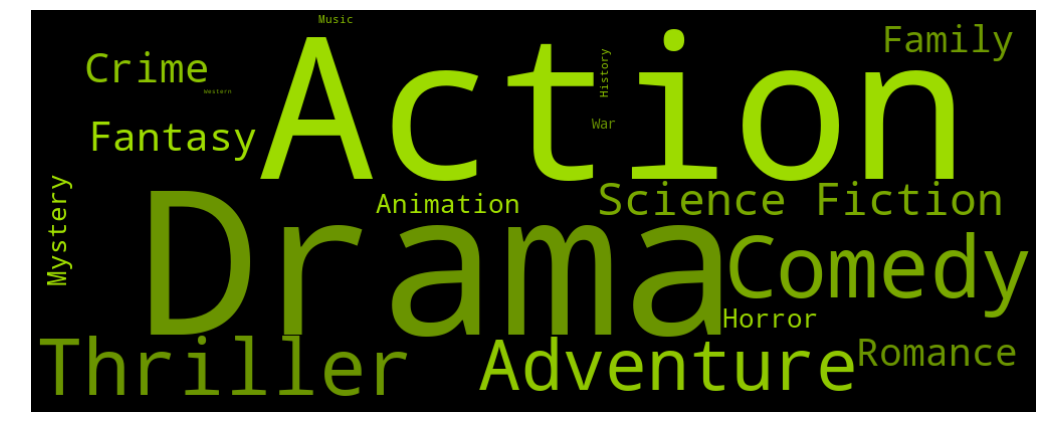

In [25]:
# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
#________________________________________________________
# I define the dictionary used to produce the wordcloud
words = dict()
trunc_occurences = genres_frequency
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 55.0 # define the color of the words
#________________________________________________________
wordcloud = WordCloud(width=1000,height=400, background_color='black', 
                      max_words=100,relative_scaling=0.8,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)

f, ax = plt.subplots(figsize=(18,18))
ax.imshow(wordcloud, interpolation="bilinear")
ax.axis('off');

 >__From the wordcloud we noted that Drama movies, Action movies, Comedy movies, Thriller movies then Adventure movies is the most popilar genres between movie aficionados they prefer to watch.__

<a id='conclusions'></a> <br>
# Conclusions

>Finally, We have encountered some difficulties here, such as the incomplete or corrupting of some of the values in the data and the lack of others or some of the data entered wrongly and unrealistically.

 >__We have tried to answer some of the questions that may be important to both filmmakers and movie aficionados:__

 >__Companies ('Warner Bros.', Walt Disney Pictures', 'Paramount Pictures', 'Lucasfilm', 'Universal Pictures') respectively are the companies with the largest share of successful films, which reached the successful formula in how to produce a film that succeeds commercially. At the same time we found it difficult to produce a film with a budget exceeding $ 100 million and then the film fails commercially. It definitely concerns producers. Movies know you so dare or make a decision to produce a high-budget movie.__
 >__We also know that films that are commercially successful often get a high rating afterwards by movie aficionados.
We have found that drama, action, comedian, thriller and fantasy movies are the most popular films among film aficionados, and it is important to know filmmakers to see the general taste among movie buffs.__